# Norway Car Sales project 

## Train LSTM Recurrent Neural Network using Keras and Tensorflow

In [2]:
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


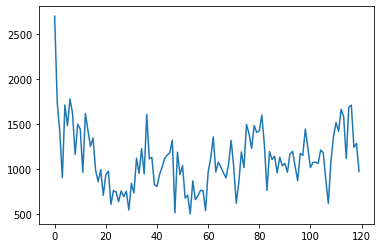

In [3]:
# load the dataset
dataframe = pandas.read_csv('MSCI334_Toyota_Data.csv', usecols=[1],engine='python')
plt.plot(dataframe)
plt.show()

dataset = dataframe.values

# floats are more suitable for neural networks than ints
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


80 40


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape train and test datasets into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# Current shape of trainX/testX = [samples, features] = [array of [array of features] = samples]
# Reshape input to be [samples, time steps, features] to feed into LSTM
# Here, we are reshaping trainX to have 3 dimensions, where the 1st dimension represents # of samples,
#   the second dimension is the number of timesteps that comprise the problem (# of values in a given lookback), and the
#   the third dimension represents the number of input features being fed into the model
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [9]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
for i in range(50):
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
# outer loop of epochs to leverage LSTM statefulness
num_epochs = 400
for i in range(num_epochs):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()


Epoch 1/1
 - 35s - loss: 0.0385
Epoch 1/1
 - 10s - loss: 0.0271
Epoch 1/1
 - 9s - loss: 0.0243
Epoch 1/1
 - 9s - loss: 0.0233
Epoch 1/1
 - 8s - loss: 0.0227
Epoch 1/1
 - 8s - loss: 0.0223
Epoch 1/1
 - 9s - loss: 0.0219
Epoch 1/1
 - 10s - loss: 0.0217
Epoch 1/1
 - 9s - loss: 0.0214
Epoch 1/1
 - 8s - loss: 0.0213
Epoch 1/1
 - 8s - loss: 0.0211
Epoch 1/1
 - 8s - loss: 0.0210
Epoch 1/1
 - 10s - loss: 0.0208
Epoch 1/1
 - 11s - loss: 0.0207
Epoch 1/1
 - 14s - loss: 0.0206
Epoch 1/1
 - 12s - loss: 0.0206
Epoch 1/1
 - 8s - loss: 0.0205
Epoch 1/1
 - 9s - loss: 0.0204
Epoch 1/1
 - 10s - loss: 0.0204
Epoch 1/1
 - 9s - loss: 0.0203
Epoch 1/1
 - 12s - loss: 0.0202
Epoch 1/1
 - 8s - loss: 0.0202
Epoch 1/1
 - 8s - loss: 0.0201
Epoch 1/1
 - 8s - loss: 0.0201
Epoch 1/1
 - 10s - loss: 0.0201
Epoch 1/1
 - 11s - loss: 0.0200
Epoch 1/1
 - 8s - loss: 0.0200
Epoch 1/1
 - 10s - loss: 0.0200
Epoch 1/1
 - 9s - loss: 0.0199
Epoch 1/1
 - 9s - loss: 0.0199
Epoch 1/1
 - 8s - loss: 0.0199
Epoch 1/1
 - 9s - loss: 0.0

KeyboardInterrupt: 

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)



In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])



In [ ]:
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

print('Training Set Error: ')

# calculate mean squared error
trainMse = mean_squared_error(trainY[0], trainPredict[:,0])
print('Mean Squared Error: %.2f MSE' % (trainMse))

# calculate root mean squared error
trainRmse = math.sqrt(trainMse)
print('Root Mean Squared Error: %.2f RMSE' % (trainRmse))

# calculate mean absolute error
trainMae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Mean Absolute Error: %.2f MAE' % (trainMae))

# calculate mean absolute percentage error
trainMape = numpy.mean(numpy.abs((trainY[0] - trainPredict[:,0]) / trainY[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (trainMape))

print('Test Set Error: ')

# calculate mean squared error
testMse = mean_squared_error(testY[0], testPredict[:,0])
print('Mean Squared Error: %.2f MSE' % (testMse))

# calculate root mean squared error
testRmse = math.sqrt(testMse)
print('Root Mean Squared Error: %.2f RMSE' % (testRmse))

# calculate mean absolute error
testMae = mean_absolute_error(testY[0], testPredict[:,0])
print('Mean Absolute Error: %.2f MAE' % (testMae))

# calculate mean absolute percentage error
testMape = numpy.mean(numpy.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (testMape))


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()




## Save the Keras + Tensorflow RNN

In [ ]:
# save model and architecture to single file
model.save("norwayCarRNN.h5")

## Forecast for 2017

In [ ]:
# load the actual 2017 data
dataframe_2017 = pandas.read_csv('MSCI334_2017_Toyota_Sales.csv', usecols=[1],engine='python')
dataset_2017 = dataframe_2017.values
dataset_2017 = dataset_2017.astype('float32')

# normalize the dataset
dataset_2017 = scaler.fit_transform(dataset_2017)

## Create the prediction and validation datasets

forecasted sales for 2017 will be predicted by using the prediction dataset, and error will be measured using the validation dataset


In [ ]:
# Set up the datasets such that the RNN will predict the next month of sales based on previous 6 months
look_back = 6
inputs, targets = create_dataset(dataset_2017, look_back)

In [ ]:
# Reshape input to be [samples, time steps, features] to feed into LSTM
inputs = numpy.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

## Make predictions

In [ ]:
# make predictions
predictions = model.predict(inputs, batch_size=batch_size)

# invert the normalization done on predictions and targets sets to properly calculate error
predictions = scaler.inverse_transform(predictions)
targets = scaler.inverse_transform([targets])

## Error testing

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# calculate mean squared error
mse = mean_squared_error(targets[0], predictions[:,0])
print('Mean Squared Error: %.2f MSE' % (mse))

# calculate root mean squared error
rmse = math.sqrt(mse)
print('Root Mean Squared Error: %.2f RMSE' % (rmse))

# calculate mean absolute error
mae = mean_absolute_error(targets[0], predictions[:,0])
print('Mean Absolute Error: %.2f MAE' % (mae))

# calculate mean absolute percentage error
mape = numpy.mean(numpy.abs((targets[0] - predictions[:,0]) / targets[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (mape))

## Plotting the forecasted results

In [ ]:
# invert the scaling transformation on the 2017 dataset
dataset_2017 = scaler.inverse_transform(dataset_2017)

In [ ]:
# read in entire dataset with datapoints including 2017
totaldf = pandas.read_csv('toyota_sales_total.csv', usecols=[1],engine='python')
totalData = totaldf.values
# floats are more suitable for neural networks than ints
totalData = totalData.astype('float32')

## Actual Sales (blue line) vs Predicted Sales

In [ ]:
# shift predictions for plotting
predictionsPlot = numpy.empty_like(totalData)
predictionsPlot[:, :] = numpy.nan
predictionsPlot[len(dataset):len(totalData), :] = predictions
plt.plot(totalData)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(predictionsPlot)
plt.show()


## 2017 Sales vs Predicted Sales

In [ ]:
dataset_2017plot = numpy.empty_like(targets[0])
dataset_2017plot[:] = numpy.nan
dataset_2017plot[:] = predictions[:,0]
plt.plot(targets[0])
plt.plot(dataset_2017plot)
plt.show()

In [ ]:
print(predictions[:,0])